### Data Preprocessing

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
import xgboost as xgb

In [5]:
df = pd.read_csv('D:\Major_Project\dataset\Parman_dataset\emg_all_features_labeled.csv')
raw = pd.read_csv('D:\Major_Project\dataset\Parman_dataset\index_finger_motion_raw.csv')
print(df.shape, raw.shape)

(6822, 81) (223793, 8)


### Data Exploration

In [6]:
df.head()

,0.029437,0.051465,0.089432,0.016893,0.014127,0.017735,0.019645,0.014079,0.030692,0.052209,...,2.3516,2,3,6,0,0.1,1,1.1,0.2,1.2
0,0.035060,0.025699,0.025286,0.020039,0.012505,0.016996,0.017674,0.014974,0.036073,0.027496,...,2.3906,3,2,2,2,0,0,1,1,1
1,0.043982,0.033187,0.071985,0.018900,0.016712,0.025793,0.025291,0.020268,0.044961,0.034351,...,2.7813,3,2,4,0,1,2,1,2,1
2,0.032677,0.031038,0.033345,0.020213,0.016290,0.028113,0.027834,0.019944,0.033778,0.032369,...,2.4141,2,1,1,0,0,2,2,1,1
3,0.032101,0.029580,0.035939,0.037279,0.014564,0.022579,0.018042,0.015792,0.033035,0.030936,...,2.3516,2,1,6,4,0,1,0,0,1
4,0.034332,0.029158,0.027977,0.025456,0.015080,0.023670,0.025631,0.018851,0.035562,0.030472,...,2.6641,2,2,1,2,0,2,2,2,1


In [7]:
df.describe()

,0.029437,0.051465,0.089432,0.016893,0.014127,0.017735,0.019645,0.014079,0.030692,0.052209,...,2.3516,2,3,6,0,0.1,1,1.1,0.2,1.2
count,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,...,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000,6822.000000
mean,0.040823,0.065489,0.097874,0.036480,0.024884,0.045121,0.099462,0.054163,0.042424,0.066619,...,8.709442,2.051305,3.880094,4.994723,1.738053,0.733656,2.194811,4.317942,2.604955,3.847112
std,0.039008,0.055671,0.098010,0.029872,0.017541,0.044636,0.109739,0.066580,0.038112,0.054745,...,11.202169,2.727362,3.367661,3.830100,2.516240,1.432499,2.544202,4.110435,3.412000,1.962840
min,0.006165,0.006814,0.006432,0.006443,0.006949,0.006798,0.006615,0.006122,0.010712,0.011779,...,0.945310,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.015790,0.027960,0.034170,0.017518,0.013873,0.019946,0.019318,0.014736,0.018266,0.029564,...,2.421900,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.027571,0.050213,0.059132,0.025909,0.020272,0.031550,0.052236,0.026368,0.029022,0.051035,...,4.085900,1.000000,3.000000,5.000000,0.000000,0.000000,1.000000,3.000000,1.000000,4.000000
75%,0.049174,0.084064,0.122622,0.046268,0.030887,0.053941,0.139770,0.063585,0.049878,0.084332,...,9.753900,3.000000,6.000000,8.000000,3.000000,1.000000,4.000000,8.000000,4.000000,5.000000
max,0.309780,0.419220,0.487810,0.245450,0.221130,0.459510,0.548000,0.432420,0.308750,0.417830,...,78.719000,13.000000,14.000000,14.000000,13.000000,11.000000,14.000000,14.000000,14.000000,7.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6822 entries, 0 to 6821
Data columns (total 81 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   0.029437     6822 non-null   float64
 1   0.051465     6822 non-null   float64
 2   0.089432     6822 non-null   float64
 3   0.016893     6822 non-null   float64
 4   0.014127     6822 non-null   float64
 5   0.017735     6822 non-null   float64
 6   0.019645     6822 non-null   float64
 7   0.014079     6822 non-null   float64
 8   0.030692     6822 non-null   float64
 9   0.052209     6822 non-null   float64
 10  0.08977      6822 non-null   float64
 11  0.019609     6822 non-null   float64
 12  0.016973     6822 non-null   float64
 13  0.020182     6822 non-null   float64
 14  0.021575     6822 non-null   float64
 15  0.017081     6822 non-null   float64
 16  -0.16406     6822 non-null   float64
 17  -0.28906     6822 non-null   float64
 18  -0.53906     6822 non-null   float64
 19  -0.054

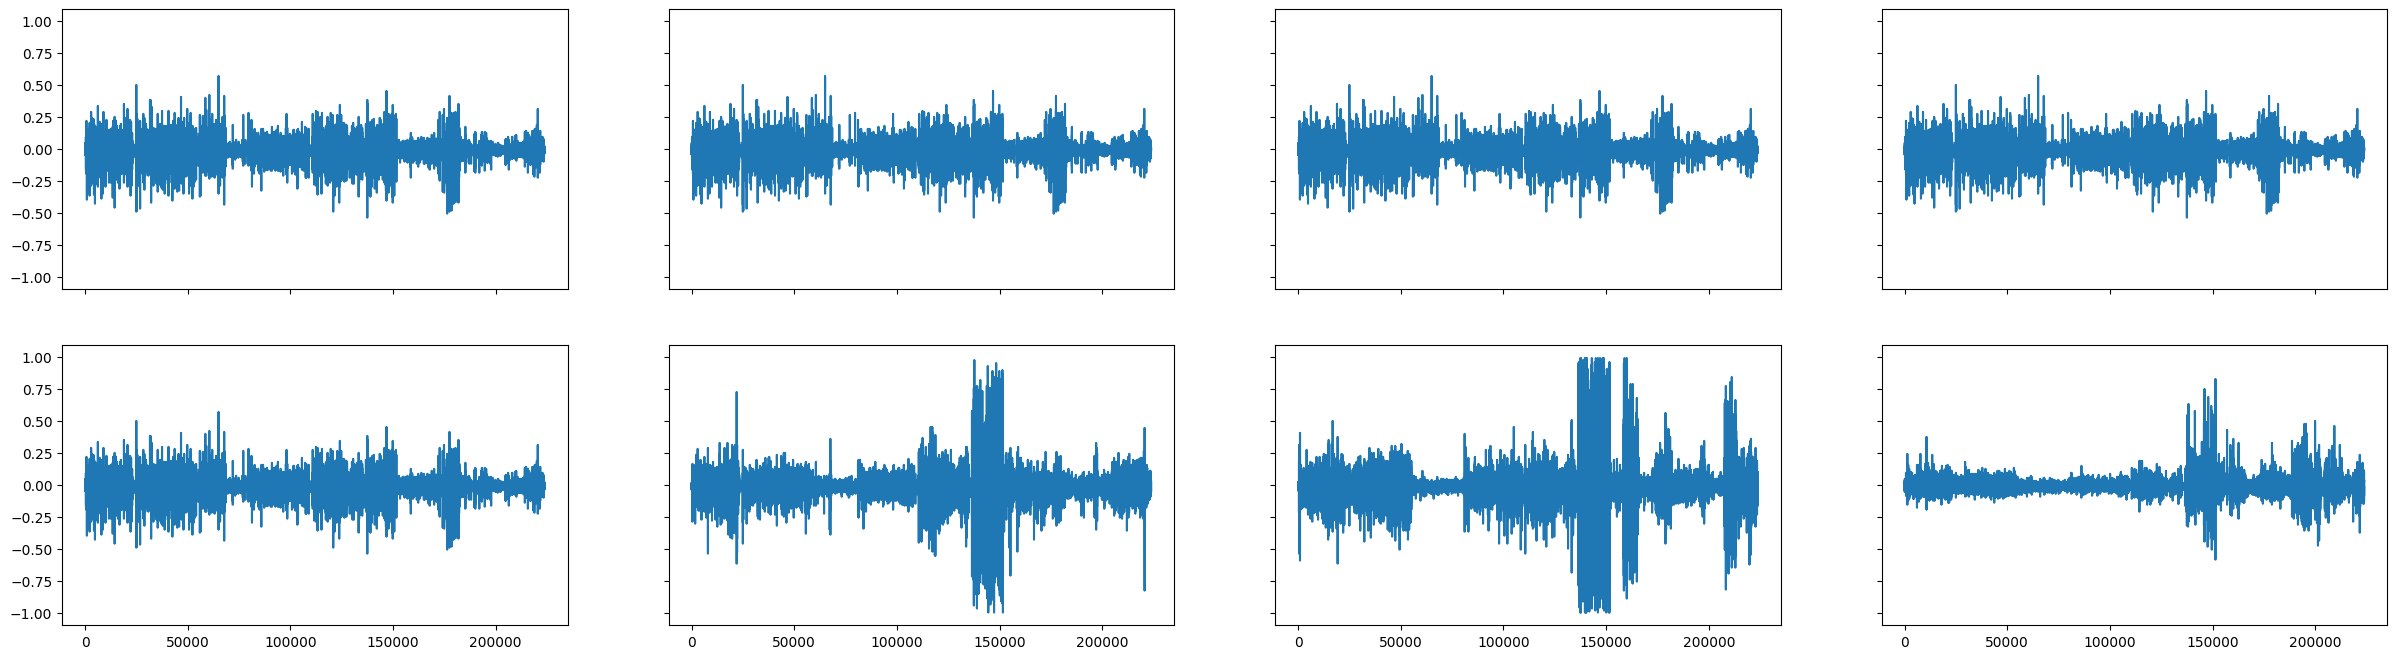

In [9]:
def plot_data(data):    
    fig, axes = plt.subplots(2,4, figsize=(30, 8), sharex=True, sharey=True)
    for i in range(2):
        for j in range(4):
            axes[i][j].plot(data.iloc[:,i*j])
        
plot_data(raw)

### Splitting the dataset into train and test set

In [10]:
x = df.iloc[:,:80].copy()
y = df.iloc[:,80].copy()
print(x.shape)
print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

(6822, 80)
(6822,)


### Feature Scaling

In [11]:
SC = StandardScaler()
x_train = pd.DataFrame(SC.fit_transform(x_train))
x_test = pd.DataFrame(SC.transform(x_test))

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### Building the model

In [13]:
model_XGB = xgb.XGBClassifier()
model_RF = RandomForestClassifier(n_estimators = 100, random_state=1)
model_SVM = svm.SVC(kernel='linear')
model_GNB = GaussianNB()

model_XGB.fit(x_train, y_train)
model_RF.fit(x_train, y_train)
model_SVM.fit(x_train, y_train)
model_GNB.fit(x_train, y_train)

GaussianNB()

In [ ]:
model_XGB

In [14]:
y_pred = model_RF.predict(x_test)
y_p = model_XGB.predict(x_test)
y_pred_svm = model_SVM.predict(x_test)
y_pred_gnb = model_GNB.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_xgb = accuracy_score(y_test, y_p)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print("Accuracy for RF: %.2f%%" % (accuracy_rf * 100.00))
print("Accuracy for XGB: %.2f%%" % (accuracy_xgb * 100.00))
print("Accuracy for SVM: %.2f%%" % (accuracy_svm * 100.00))
print("Accuracy for GNB: %.2f%%" % (accuracy_gnb * 100.00))

Accuracy for RF: 94.37%
Accuracy for XGB: 94.67%
Accuracy for SVM: 88.86%
Accuracy for GNB: 58.26%


In [15]:
y_true = np.array(y_test)
y_pred_rf = np.array(model_RF.predict(x_test))
y_pred_xgb = np.array(model_XGB.predict(x_test))


In [16]:
cm_rf = confusion_matrix(y_true, y_pred)
cm_xgb = confusion_matrix(y_true, y_pred_xgb)

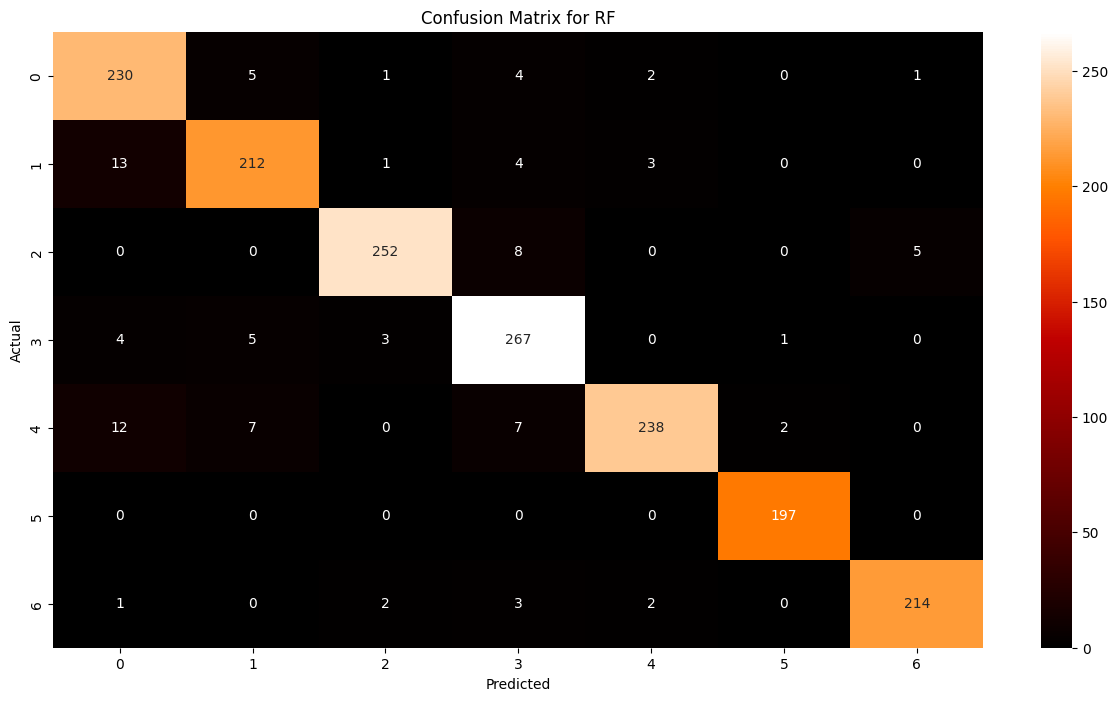

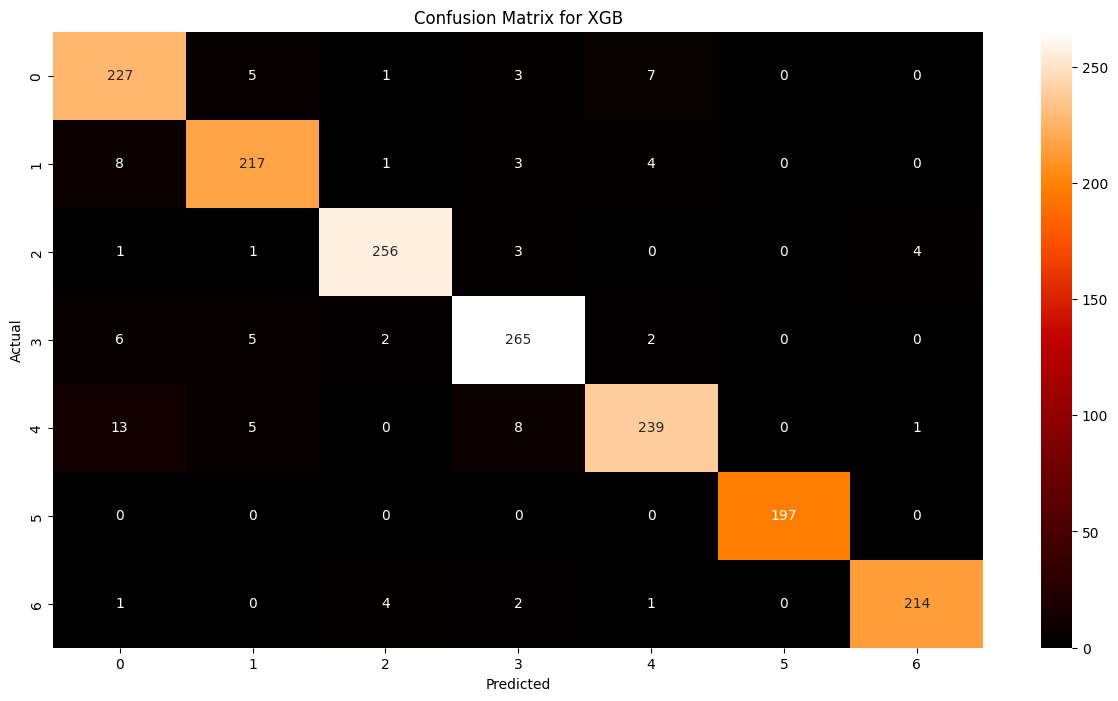

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='gist_heat', cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for RF")
plt.show()
plt.figure(figsize = (15,8))
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='gist_heat',cbar=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGB")
plt.show()